In [2]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show

In [3]:
hotel=pd.read_csv('hotel_bookings.csv', na_values=['none','undefined','','-'])

In [4]:
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel.reservation_status_date

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

In [7]:
hotel['reservation_status_date']= pd.to_datetime(hotel['reservation_status_date'])

In [8]:
hotel.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [9]:
hotel['is_canceled'] = hotel['is_canceled'].astype(bool)

In [10]:
hotel['arrival_date_month']=hotel['arrival_date_month'].astype('str')
hotel['arrival_date_year']=hotel['arrival_date_year'].astype('str')
hotel['arrival_date_day_of_month']=hotel['arrival_date_day_of_month'].astype('str')

In [11]:
hotel['arrival_date']=[day+' '+month+' '+year for day,month,year in zip(hotel['arrival_date_day_of_month'],hotel['arrival_date_month'],hotel['arrival_date_year'])]

In [12]:
hotel['arrival_date']

0            1 July 2015
1            1 July 2015
2            1 July 2015
3            1 July 2015
4            1 July 2015
               ...      
119385    30 August 2017
119386    31 August 2017
119387    31 August 2017
119388    31 August 2017
119389    29 August 2017
Name: arrival_date, Length: 119390, dtype: object

In [13]:
hotel=hotel.drop(columns=['arrival_date_day_of_month','arrival_date_month'])

In [14]:

yes_no= lambda row : 'yes' if row['agent'].isnull() and row['company'].isnull() else 'no'

In [15]:
import math
hotel['direct_booking']=hotel.apply(lambda row : 'yes' if math.isnan(row['agent']) and math.isnan(row['company']) else 'no',axis=1)

In [16]:
hotel['direct_booking']

0         yes
1         yes
2         yes
3          no
4          no
         ... 
119385     no
119386     no
119387     no
119388     no
119389     no
Name: direct_booking, Length: 119390, dtype: object

In [17]:
hotel.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_week_number          False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True
days_in_waiting_list              False
customer_type                     False


In [18]:
hotel['children'].value_counts(dropna=False)

0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: children, dtype: int64

In [19]:
hotel['children']=hotel['children'].fillna(0)

In [20]:
hotel['country'].value_counts(dropna=False)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64

In [21]:
hotel['country']=hotel['country'].fillna('PRT')

In [22]:
hotel['agent']=hotel['agent'].fillna(0)

In [23]:
hotel['company']=hotel['company'].fillna(0)

In [24]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  bool          
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  object        
 4   arrival_date_week_number        119390 non-null  int64         
 5   stays_in_weekend_nights         119390 non-null  int64         
 6   stays_in_week_nights            119390 non-null  int64         
 7   adults                          119390 non-null  int64         
 8   children                        119390 non-null  float64       
 9   babies                          119390 non-null  int64         
 10  meal                            119390 non-null  object 

In [25]:
hotel.required_car_parking_spaces.value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

Text(0.5, 0.98, 'The count of required car parking spaces')

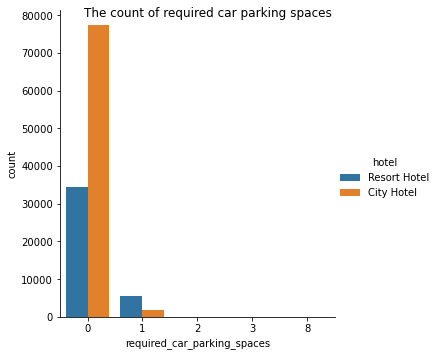

In [26]:
sns.catplot(data=hotel ,x='required_car_parking_spaces',kind='count',hue='hotel')
plt.suptitle('The count of required car parking spaces')


Text(0.5, 1.1, 'percent of canceled babies arrivals per hotel')

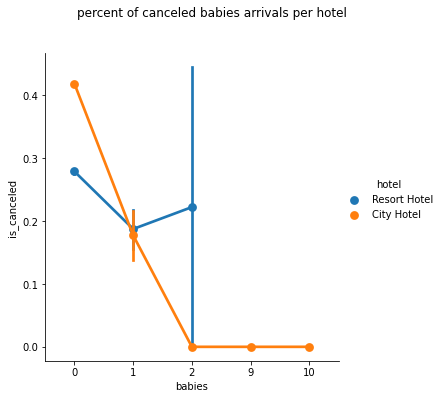

In [27]:
sns.catplot(data=hotel ,x='babies',y='is_canceled', kind='point',hue='hotel')
plt.suptitle('percent of canceled babies arrivals per hotel', y=1.1)

Text(0.5, 1.1, 'percent of canceled children arrivals per hotel')

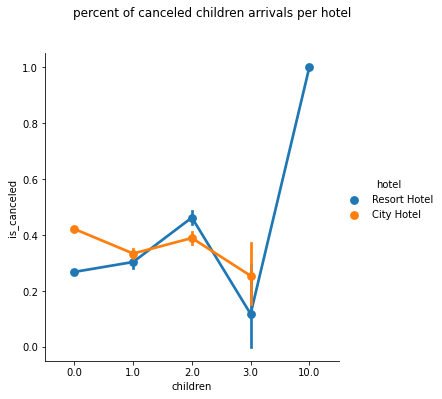

In [28]:
sns.catplot(data=hotel ,x='children',y='is_canceled', kind='point',hue='hotel')
plt.suptitle('percent of canceled children arrivals per hotel', y=1.1)

Text(0.5, 0.98, 'The count of arrivals per year')

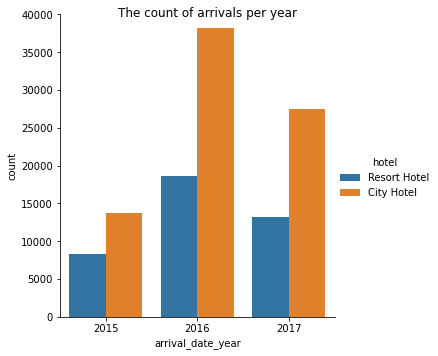

In [29]:
sns.catplot(data=hotel, x='arrival_date_year',kind='count',hue='hotel')
plt.suptitle('The count of arrivals per year')

In [30]:
dict_time=hotel.lead_time.value_counts().to_dict()
dict_time


{0: 6345,
 1: 3460,
 2: 2069,
 3: 1816,
 4: 1715,
 5: 1565,
 6: 1445,
 7: 1331,
 8: 1138,
 12: 1079,
 11: 1055,
 9: 992,
 10: 976,
 14: 965,
 16: 942,
 17: 881,
 15: 839,
 19: 839,
 34: 828,
 18: 826,
 13: 821,
 28: 820,
 20: 750,
 40: 722,
 29: 712,
 22: 707,
 32: 690,
 31: 685,
 21: 678,
 56: 676,
 39: 673,
 37: 673,
 26: 671,
 24: 665,
 36: 663,
 30: 659,
 35: 655,
 25: 653,
 27: 649,
 33: 643,
 23: 643,
 44: 633,
 41: 607,
 55: 575,
 38: 575,
 47: 568,
 68: 564,
 69: 558,
 45: 537,
 72: 531,
 53: 530,
 50: 527,
 59: 520,
 74: 519,
 61: 513,
 48: 506,
 46: 495,
 49: 479,
 43: 479,
 54: 472,
 66: 466,
 42: 464,
 86: 461,
 102: 458,
 57: 457,
 87: 450,
 88: 448,
 65: 448,
 92: 441,
 80: 440,
 67: 439,
 60: 436,
 52: 435,
 99: 430,
 75: 425,
 64: 423,
 71: 423,
 112: 423,
 98: 420,
 115: 420,
 62: 414,
 104: 413,
 105: 412,
 73: 402,
 58: 401,
 63: 398,
 116: 395,
 82: 393,
 95: 392,
 134: 384,
 78: 384,
 70: 384,
 83: 378,
 103: 377,
 113: 373,
 96: 368,
 51: 366,
 151: 365,
 81: 360,

In [31]:
p = figure(sizing_mode="stretch_width", max_width=500, height=250)
#show(p)
p.line(x=hotel['previous_cancellations'], y=hotel['stays_in_week_nights'])
show(p)

In [32]:
hotel['is_canceled'].value_counts()

False    75166
True     44224
Name: is_canceled, dtype: int64

In [33]:
hotel.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'direct_booking'],
      dtype='object')

In [34]:
hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,direct_booking
0,Resort Hotel,False,342,2015,27,0,0,2,0.0,0,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1 July 2015,yes
1,Resort Hotel,False,737,2015,27,0,0,2,0.0,0,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1 July 2015,yes
2,Resort Hotel,False,7,2015,27,0,1,1,0.0,0,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1 July 2015,yes
3,Resort Hotel,False,13,2015,27,0,1,1,0.0,0,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1 July 2015,no
4,Resort Hotel,False,14,2015,27,0,2,2,0.0,0,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1 July 2015,no
5,Resort Hotel,False,14,2015,27,0,2,2,0.0,0,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,1 July 2015,no
6,Resort Hotel,False,0,2015,27,0,2,2,0.0,0,...,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,1 July 2015,yes
7,Resort Hotel,False,9,2015,27,0,2,2,0.0,0,...,0.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,1 July 2015,no
8,Resort Hotel,True,85,2015,27,0,3,2,0.0,0,...,0.0,0,Transient,82.0,0,1,Canceled,2015-05-06,1 July 2015,no
9,Resort Hotel,True,75,2015,27,0,3,2,0.0,0,...,0.0,0,Transient,105.5,0,0,Canceled,2015-04-22,1 July 2015,no


In [36]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  bool          
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  object        
 4   arrival_date_week_number        119390 non-null  int64         
 5   stays_in_weekend_nights         119390 non-null  int64         
 6   stays_in_week_nights            119390 non-null  int64         
 7   adults                          119390 non-null  int64         
 8   children                        119390 non-null  float64       
 9   babies                          119390 non-null  int64         
 10  meal                            119390 non-null  object 

In [37]:
hotel.hotel

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

In [41]:
hotel.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64